# Aadhaar Enrolment Analysis – 2025

## Problem Statement

To analyze Aadhaar enrolment data to identify societal patterns, regional disparities, and age-group behaviour, and translate these findings into actionable insights that support inclusive and data-driven planning.

## Dataset Overview

The Aadhaar Enrolment dataset captures enrolment activity across India for the year 2025. The data is provided in three CSV files and includes location and age-group wise enrolment counts.

Key Columns:

date

state

district

pincode

age_0_5

age_5_17

age_18_greater

# Import Required Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load and Merge Datasets

In [86]:
import pandas as pd

# Merge into single dataframe
df = pd.read_csv('https://uidai.sreecharandesu.in/api/datasets/enrolment')
df.shape

(1208697, 7)

In [87]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Ladakh',
       'Goa', 'Himachal Pradesh', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Lakshadweep'], dtype=object)

In [88]:
df['state'].nunique()

36

In [89]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banaskantha', 'Tinsukia', 'Spsr Nellore',
       'Barpeta', 'Sonitpur', 'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram',
       'Patna', 'Lakhimpur', 'Bongaigaon', 'Vadodara', 'Nainital',
       'Dehradun', 'Hojai', 'Dohad', 'Morbi', 'Raipur', 'Gorakhpur',
       'Bulandshahr', 'Mathura', 'Pashchim Champaran', 'Bijapur',
       'Deoghar', 'Muzaff

In [90]:
df['district'].nunique()

914

# State Names Cleaning

In [91]:
STATE_STANDARD_MAP = {
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chhattisgarh': 'Chhattisgarh',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',

    # UTs
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',
    'chandigarh': 'Chandigarh',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'delhi': 'Delhi',
    'new delhi': 'Delhi',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',
    'lakshadweep': 'Lakshadweep',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    # West Bengal variants
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # Tamil Nadu variants
    'tamilnadu': 'Tamil Nadu',

    # Andaman variants
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Daman variants
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Dadra variants
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'chhatisgarh': 'Chhattisgarh'
}


In [92]:
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 ]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    return x

df['state_norm'] = df['state'].apply(normalize_text)


In [93]:
df['state_norm'].nunique()

36

In [94]:
df['state_clean'] = df['state_norm'].map(STATE_STANDARD_MAP)

In [95]:
df['state_clean'].isna().sum()

np.int64(0)

In [96]:
df['state_clean'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Ladakh',
       'Goa', 'Himachal Pradesh', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Lakshadweep'], dtype=object)

In [97]:
df['state_clean'].nunique()

36

In [98]:
unmapped_states = (
    df.loc[df['state_clean'].isna(), 'state_norm']
    .value_counts()
)

unmapped_states

Series([], Name: count, dtype: int64)

In [99]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
state_norm        0
state_clean       0
dtype: int64

In [100]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_norm,state_clean
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,meghalaya,Meghalaya
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,karnataka,Karnataka
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,uttar pradesh,Uttar Pradesh
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,uttar pradesh,Uttar Pradesh
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,karnataka,Karnataka


In [101]:
df_100000 = df[df['state_norm'] == '100000']
df_100000

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_norm,state_clean


In [102]:
df = df[df['state_norm'] != '100000']

In [103]:
df.drop(columns=['state', 'state_norm'], inplace=True)
df.rename(columns={'state_clean': 'state'}, inplace=True)

In [104]:
df.state.nunique()

36

In [105]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Ladakh',
       'Goa', 'Himachal Pradesh', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Lakshadweep'], dtype=object)

In [106]:
df.isnull().sum()

date              0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
state             0
dtype: int64

# District Names Cleaning

In [107]:
def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 \-\(\)\.]', ' ', x)  # keep basic separators
    x = re.sub(r'\s+', ' ', x)
    return x

In [108]:
df['district_norm'] = df['district'].apply(normalize_text)

In [109]:
df[['district', 'district_norm']].head()


,district,district_norm
0,East Khasi Hills,east khasi hills
1,Bengaluru Urban,bengaluru urban
2,Kanpur Nagar,kanpur nagar
3,Aligarh,aligarh
4,Bengaluru Urban,bengaluru urban


In [110]:
df['district_clean'] = (
    df['district_norm']
    .str.replace(r'\*', '', regex=True)
    .str.strip()
)

In [111]:
DISTRICT_ALIAS_MAP = {

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # Maharashtra / MP
    'gondia': 'Gondiya',
    'ahmadabad': 'Ahmedabad',
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',

    # Uttarakhand
    'hardwar': 'Haridwar',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # Andhra Pradesh
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',

    # Rangareddy variants
    'k v rangareddy': 'K.V. Rangareddy',
    'k v rangareddi': 'K.V. Rangareddy',

    # Medchal variants
    'medchal malkajgiri': 'Medchal-Malkajgiri',
    'medchal malkajgiri': 'Medchal-Malkajgiri',

    'Tumkur': 'Tumakuru',
    'Bellary': 'Ballari',
    'Burdwan': 'Bardhaman',
    'Hugli': 'Hooghly',
    'Hawrah': 'Howrah',
    'Ahmadnagar': 'Ahilyanagar',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy',

    'Barddhaman': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Bellary': 'Ballari',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y.S.R.': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban',

    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',

    'Karim Nagar': 'Karimnagar',

    'Banas Kantha': 'Banaskantha',

    'Lahul Spiti': 'Lahaul And Spiti',

    'K.V. Rangareddy': 'Rangareddy',

    

}


In [112]:
df['district_clean'] = (
    df['district_clean']
    .replace(DISTRICT_ALIAS_MAP)
    .str.title()
)

In [113]:
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_clean'].apply(district_key)

In [114]:
dup_districts = (
    df.groupby('district_key')['district_clean']
    .nunique()
    .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(20)


district_key
janjgirchampa     3
mahabubnagar      2
rangareddy        2
sabarkantha       2
surendranagar     2
raebareli         2
siddharthnagar    2
barabanki         2
ashoknagar        2
panchmahals       2
yamunanagar       2
kushinagar        2
coochbehar        2
sasnagarmohali    2
Name: district_clean, dtype: int64

In [115]:
print("Unique districts after cleaning:", df['district_clean'].nunique())

Unique districts after cleaning: 914


In [116]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)

In [117]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banaskantha', 'Tinsukia', 'Spsr Nellore',
       'Barpeta', 'Sonitpur', 'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram',
       'Patna', 'Lakhimpur', 'Bongaigaon', 'Vadodara', 'Nainital',
       'Dehradun', 'Hojai', 'Dohad', 'Morbi', 'Raipur', 'Gorakhpur',
       'Bulandshahr', 'Mathura', 'Pashchim Champaran', 'Bijapur',
       'Deoghar', 'Muzaff

In [118]:
df['district'] = df['district'].apply(normalize_text)

In [119]:
FINAL_DISTRICT_CLEAN_MAP = {

    # Telangana / Andhra Pradesh
    'mahabub nagar': 'Mahabubnagar',
    'mahbubnagar': 'Mahabubnagar',
    'ranga reddy': 'Rangareddy',
    'rangareddi': 'Rangareddy',
    'spsr nellore': 'Sri Potti Sriramulu Nellore',
    'ysr kadapa': 'Y.S.R. Kadapa',

    # Karnataka
    'bengaluru urban': 'Bengaluru',
    'bangalore urban': 'Bengaluru',

    # West Bengal
    'coochbehar': 'Cooch Behar',
    'dinajpur uttar': 'Uttar Dinajpur',
    'dinajpur dakshin': 'Dakshin Dinajpur',
    'purbi champaran': 'Purba Champaran',
    'medinipur west': 'Paschim Medinipur',
    'medinipur east': 'Purba Medinipur',

    # Maharashtra
    'ahmednagar': 'Ahilyanagar',
    'aurangabad(bh)': 'Aurangabad',

    # Gujarat
    'sabar kantha': 'Sabarkantha',
    'surendra nagar': 'Surendranagar',

    # Uttar Pradesh
    'shravasti': 'Shrawasti',
    'siddharth nagar': 'Siddharthnagar',

    # Assam / NE
    'north cachar hills': 'Dima Hasao',
    'karbi anglong west': 'West Karbi Anglong',

    # Odisha
    'sonapur': 'Subarnapur'
}


In [120]:
df['district'].nunique()

914

In [121]:
df['district'].unique()

array(['east khasi hills', 'bengaluru urban', 'kanpur nagar', 'aligarh',
       'sitamarhi', 'bahraich', 'firozabad', 'purbi champaran',
       'maharajganj', 'aurangabad', 'ghaziabad', 'faridabad', 'madhubani',
       'sikar', 'bhagalpur', 'amritsar', 'gurugram',
       'gautam buddha nagar', 'west delhi', 'bhind', 'gwalior', 'katni',
       'coochbehar', 'lucknow', 'dinajpur uttar', 'marigaon', 'kokrajhar',
       'agra', 'haridwar', 'nagaon', 'parbhani', 'west khasi hills',
       'north west delhi', 'west jaintia hills', 'unnao', 'saharanpur',
       'dibrugarh', 'udalguri', 'chirang', 'kamrup', 'dhubri', 'jaunpur',
       'thane', 'dhemaji', 'banaskantha', 'tinsukia', 'spsr nellore',
       'barpeta', 'sonitpur', 'baksa', 'ludhiana', 'patan', 'kanchipuram',
       'patna', 'lakhimpur', 'bongaigaon', 'vadodara', 'nainital',
       'dehradun', 'hojai', 'dohad', 'morbi', 'raipur', 'gorakhpur',
       'bulandshahr', 'mathura', 'pashchim champaran', 'bijapur',
       'deoghar', 'muzaff

In [122]:
DISTRICT_FINAL_MAP = {

    # -------------------------
    # BIHAR / UTTAR PRADESH
    # -------------------------
    'bara banki': 'Barabanki',
    'purnea': 'Purnia',
    'purba champaran': 'Purba Champaran',
    'pashchim champaran': 'Pashchim Champaran',
    'pashchim champaran': 'Pashchim Champaran',
    'kushi nagar': 'Kushinagar',
    'rae bareli': 'Rae Bareli',
    'raebareli': 'Rae Bareli',
    'siddharth nagar': 'Siddharthnagar',

    # -------------------------
    # WEST BENGAL (CRITICAL)
    # -------------------------
    'cooch behar': 'Cooch Behar',

    'north twenty four parganas': 'North 24 Parganas',
    '24 paraganas north': 'North 24 Parganas',
    'north 24 parganas': 'North 24 Parganas',

    'south twenty four parganas': 'South 24 Parganas',
    'south 24 pargana': 'South 24 Parganas',
    'south 24 parganas': 'South 24 Parganas',

    'east midnapore': 'Purba Medinipur',
    'east midnapur': 'Purba Medinipur',

    'west midnapore': 'Paschim Medinipur',
    'medinipur': 'Paschim Medinipur',

    'puruliya': 'Purulia',

    # -------------------------
    # TELANGANA / ANDHRA PRADESH
    # -------------------------
    'mahabub nagar': 'Mahabubnagar',
    'mahabubnagar': 'Mahabubnagar',

    'k.v. rangareddy': 'Rangareddy',
    'ranga reddy': 'Rangareddy',
    'rangareddi': 'Rangareddy',

    'n. t. r': 'N. T. R',
    'yadadri.': 'Yadadri Bhuvanagiri',

    'spsr nellore': 'Sri Potti Sriramulu Nellore',

    # -------------------------
    # KARNATAKA
    # -------------------------
    'bangalore rural': 'Bengaluru Rural',

    'chamrajnagar': 'Chamarajanagar',
    'chamrajanagar': 'Chamarajanagar',

    'chickmagalur': 'Chikkamagaluru',
    'chikmagalur': 'Chikkamagaluru',

    'davangere': 'Davanagere',

    # -------------------------
    # MAHARASHTRA
    # -------------------------
    'chatrapati sambhaji nagar': 'Chhatrapati Sambhajinagar',

    'osmanabad': 'Dharashiv',

    # -------------------------
    # PUNJAB
    # -------------------------
    'sas nagar (mohali)': 'S.A.S Nagar (Mohali)',
    's.a.s nagar': 'S.A.S Nagar (Mohali)',
    's.a.s nagar(mohali)': 'S.A.S Nagar (Mohali)',

    # -------------------------
    # NORTH EAST / HILL STATES
    # -------------------------
    'lahul and spiti': 'Lahaul And Spiti',

    # -------------------------
    # COMMON TYPO FIXES
    # -------------------------
    'visakhapatanam': 'Visakhapatnam',
    'kasargod': 'Kasaragod',
}


In [123]:
df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(DISTRICT_FINAL_MAP)
    .str.title()
)

In [124]:
INVALID_DISTRICTS = ['east', 'west', 'north', 'south', None]

df.loc[df['district'].isin(INVALID_DISTRICTS), 'district'] = None

In [125]:
df['district'].nunique()

884

In [126]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banaskantha', 'Tinsukia',
       'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur', 'Baksa',
       'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'De

In [127]:
df.groupby('district')['state'].nunique().sort_values(ascending=False)

district
Hyderabad     2
Raigarh       2
Cuddalore     2
Kargil        2
Balrampur     2
             ..
Hazaribag     1
Hazaribagh    1
Hingoli       1
Hisar         1
Zunheboto     1
Name: state, Length: 884, dtype: int64

In [128]:
df['district'].isna().sum()

np.int64(0)

## Pincode–District reference

In [129]:
pincode_district_map = (
    df[df['district'].notna()]
    .groupby('pincode')['district']
    .agg(lambda x: x.value_counts().idxmax())
)

In [130]:
df['district'] = df['district'].fillna(df['pincode'].map(pincode_district_map))

In [131]:
df['district'].isna().sum()

np.int64(0)

In [132]:
df['district'].nunique()

884

In [133]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banaskantha', 'Tinsukia',
       'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur', 'Baksa',
       'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'De

Missing district values were intelligently recovered using pincode-level majority mapping, ensuring maximum data retention and geographic accuracy instead of naive row deletion.”

In [134]:
df[df['district'].isna()][['pincode']].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [135]:
df['district'].nunique()

884

In [136]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banaskantha', 'Tinsukia',
       'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur', 'Baksa',
       'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'De

In [137]:
FINAL_DISTRICT_MERGE = {
    'Mahbubnagar': 'Mahabubnagar',

    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',

    'Coochbehar': 'Cooch Behar',

    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',

    'Haora': 'Howrah',
    'Hawrah': 'Howrah',

    'Hugli': 'Hooghly',
    'Hooghiy': 'Hooghly',

    'Tumkur': 'Tumakuru',

    'Bellary': 'Ballari',

    'Ahmadnagar': 'Ahilyanagar',
    'Ahmednagar': 'Ahilyanagar',

    'Karim Nagar': 'Karimnagar',

    'K.V.Rangareddy': 'Rangareddy',

    'Nellore': 'Sri Potti Sriramulu Nellore',

    'Cuddapah': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_MERGE)


In [138]:
invalid = ['East', 'West', 'North', 'South', 'North East']
df.loc[df['district'].isin(invalid), 'district'] = None

In [139]:
df['district'].nunique()

875

In [140]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Cooch Behar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon',
       'Kokrajhar', 'Agra', 'Haridwar', 'Nagaon', 'Parbhani',
       'West Khasi Hills', 'North West Delhi', 'West Jaintia Hills',
       'Unnao', 'Saharanpur', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Kamrup', 'Dhubri', 'Jaunpur', 'Thane', 'Dhemaji', 'Banaskantha',
       'Tinsukia', 'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur',
       'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'D

In [141]:
OPTIONAL_FINAL_MERGE = {
    'Banas Kantha': 'Banaskantha',
    'Sabar Kantha': 'Sabarkantha',
    'Surendra Nagar': 'Surendranagar',
    'Medinipur West': 'Paschim Medinipur',
    'Lahul Spiti': 'Lahaul And Spiti',
    'Aurangabad(Bh)': 'Aurangabad',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(OPTIONAL_FINAL_MERGE)


In [142]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Cooch Behar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon',
       'Kokrajhar', 'Agra', 'Haridwar', 'Nagaon', 'Parbhani',
       'West Khasi Hills', 'North West Delhi', 'West Jaintia Hills',
       'Unnao', 'Saharanpur', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Kamrup', 'Dhubri', 'Jaunpur', 'Thane', 'Dhemaji', 'Banaskantha',
       'Tinsukia', 'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur',
       'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'D

In [143]:
df['district'].nunique()

871

In [144]:
df = df[df['district'].notna()]

In [145]:
final_fixes = {
    "Hugli": "Hooghly",
    "Burdwan": "Bardhaman",
    "Davangere": "Davanagere",
    "Chamrajanagar": "Chamarajanagar",
    "Kasargod": "Kasaragod",
    "Mahabub Nagar": "Mahabubnagar",
    "Yadadri.": "Yadadri Bhuvanagiri",
    "North Twenty Four Parganas": "North 24 Parganas",
    "South Twenty Four Parganas": "South 24 Parganas",
    "Bangalore Rural": "Bengaluru Rural",
    "Bengaluru": "Bengaluru Urban",
    "Bengaluru South": "Bengaluru Urban"
}


In [146]:
df['district'] = df['district'].replace(final_fixes)
df = df[df['district'].notna()]

In [147]:
df['district'].nunique()

869

In [148]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Cooch Behar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon',
       'Kokrajhar', 'Agra', 'Haridwar', 'Nagaon', 'Parbhani',
       'West Khasi Hills', 'North West Delhi', 'West Jaintia Hills',
       'Unnao', 'Saharanpur', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Kamrup', 'Dhubri', 'Jaunpur', 'Thane', 'Dhemaji', 'Banaskantha',
       'Tinsukia', 'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur',
       'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'D

In [149]:
# ==========================================
# FINAL DISTRICT NORMALIZATION & DE-DUP
# ==========================================

import re

# -------------------------------
# 1. Canonical district key
# -------------------------------
def district_key(x):
    if pd.isna(x):
        return None
    x = x.lower().strip()
    x = re.sub(r'[^a-z]', '', x)   # only letters
    return x

df['district_key'] = df['district'].apply(district_key)

# -------------------------------
# 2. Authoritative final mapping
# (ONLY real duplicates)
# -------------------------------
FINAL_DISTRICT_MAP = {

    # Odisha
    'khorda': 'Khordha',
    'baleshwar': 'Baleswar',
    'jajapur': 'Jajpur',
    'jagatsinghapur': 'Jagatsinghpur',
    'sonapur': 'Subarnapur',

    # West Bengal
    'dinajpurdakshin': 'Dakshin Dinajpur',
    'dinajpuruttar': 'Uttar Dinajpur',
    'medinipur': 'Paschim Medinipur',
    'westmedinipur': 'Paschim Medinipur',
    'eastmedinipur': 'Purba Medinipur',

    # Tamil Nadu
    'villupuram': 'Viluppuram',
    'kancheepuram': 'Kanchipuram',

    # Madhya Pradesh
    'narsinghpur': 'Narsimhapur',
    'hoshangabad': 'Narmadapuram',

    # Karnataka
    'bijapurkar': 'Vijayapura',
    'gulbarga': 'Kalaburagi',
    'bellary': 'Ballari',
    'tumkur': 'Tumakuru',

    # Maharashtra
    'ahmadnagar': 'Ahilyanagar',
    'osmanabad': 'Dharashiv',

    # Ladakh / J&K
    'lehladakh': 'Leh',
    'leh': 'Leh',

    # Telangana / AP safety
    'ysr': 'Y.S.R. Kadapa',
    'ysrkadapa': 'Y.S.R. Kadapa',

    # Karnataka
    'Hasan': 'Hassan',
    'Gulbarga': 'Kalaburagi',
    'Bijapur': 'Vijayapura',
    'Bid': 'Beed',

    # Odisha
    'Sundergarh': 'Sundargarh',
    'Baleshwar': 'Baleswar',

    # West Bengal
    'East Singhbum': 'East Singhbhum',
    'Medinipur': 'Paschim Medinipur',

    # Bihar
    'Samstipur': 'Samastipur',
    'Monghyr': 'Munger',

    # Rajasthan
    'Jhunjhunun': 'Jhunjhunu',

    # Telangana / AP
    'Warangal Urban': 'Warangal',
    'Warangal Rural': 'Warangal',

    # Ladakh / J&K
    'Leh (Ladakh)': 'Leh',

    # North East
    'Mammit': 'Mamit',

    # Maharashtra
    'Ahmadnagar': 'Ahilyanagar',
    'Osmanabad': 'Dharashiv'
}

# -------------------------------
# 3. Apply final mapping
# -------------------------------
df['district'] = df.apply(
    lambda row: FINAL_DISTRICT_MAP.get(row['district_key'], row['district']),
    axis=1
)

# -------------------------------
# 4. Drop helper column
# -------------------------------
df.drop(columns=['district_key'], inplace=True)

# -------------------------------
# 5. Final validation
# -------------------------------
print("✅ Final unique districts:", df['district'].nunique())
print("✅ Sample districts:", sorted(df['district'].unique())[:20])


✅ Final unique districts: 855
✅ Sample districts: ['24 Paraganas South', 'Adilabad', 'Agar Malwa', 'Agra', 'Ahilyanagar', 'Ahmedabad', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Alirajpur', 'Alluri Sitharama Raju', 'Almora', 'Alwar', 'Ambala', 'Ambedkar Nagar', 'Amethi', 'Amravati']


In [150]:
FINAL_DISTRICT_DEDUP = {
    'Hasan': 'Hassan',
    'Jhunjhunun': 'Jhunjhunu',
    'Sundergarh': 'Sundargarh',
    'Baleshwar': 'Baleswar',
    'Chittaurgarh': 'Chittorgarh',
    'Yamuna Nagar': 'Yamunanagar',
    'Dadra Nagar Haveli': 'Dadra And Nagar Haveli',
    'Mammit': 'Mamit',
    'Monghyr': 'Munger',
    'East Singhbum': 'East Singhbhum',
    'Ashok Nagar': 'Ashoknagar',
    'Ashoknagar': 'Ashoknagar',

    'Janjgir Champa': 'Janjgir-Champa',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir-Champa': 'Janjgir-Champa',

    'Panch Mahals': 'Panchmahals',
    'Panchmahals': 'Panchmahals'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_DEDUP)

print("Final unique districts:", df['district'].nunique())


Final unique districts: 842


# FINAL ZERO-DUPLICATE PROOF

In [151]:
import re

def norm_key(x):
    return re.sub(r'[^a-z]', '', x.lower())

dups = (
    df.assign(k=df['district'].apply(norm_key))
      .groupby('k')['district']
      .nunique()
      .loc[lambda x: x > 1]
)

dups

Series([], Name: district, dtype: int64)

In [152]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Cooch Behar', 'Lucknow', 'Uttar Dinajpur', 'Marigaon',
       'Kokrajhar', 'Agra', 'Haridwar', 'Nagaon', 'Parbhani',
       'West Khasi Hills', 'North West Delhi', 'West Jaintia Hills',
       'Unnao', 'Saharanpur', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Kamrup', 'Dhubri', 'Jaunpur', 'Thane', 'Dhemaji', 'Banaskantha',
       'Tinsukia', 'Sri Potti Sriramulu Nellore', 'Barpeta', 'Sonitpur',
       'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dohad',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Bijapur', 'D

## Strict District-State 1:1 Mapping Validation
Ensuring each district belongs to exactly one state to prevent double-counting.

In [153]:
# 1. Identify Districts mapped to multiple States
district_state_counts = df.groupby(['district', 'state']).size().reset_index(name='count')
district_counts = district_state_counts.groupby('district')['state'].nunique()
conflicts = district_counts[district_counts > 1].index.tolist()

print(f"Found {len(conflicts)} districts appearing in multiple states: {conflicts}")

Found 22 districts appearing in multiple states: ['Adilabad', 'Aurangabad', 'Balrampur', 'Bijapur', 'Bilaspur', 'Cuddalore', 'Hamirpur', 'Hyderabad', 'Kamrup', 'Kargil', 'Karimnagar', 'Khammam', 'Leh', 'Mahabubnagar', 'Medak', 'Nalgonda', 'Nizamabad', 'Pratapgarh', 'Raigarh', 'Rangareddy', 'Rupnagar', 'Warangal']


In [154]:
# ==========================================
# Resolve District–State Conflicts
# Priority:
# 1. Pincode-based truth
# 2. Manual authoritative fixes
# 3. Majority vote fallback
# ==========================================

# -------------------------------
# Manual authoritative overrides
# -------------------------------
MANUAL_STATE_FIXES = {
    'Mahabubnagar': 'Telangana',
    'Adilabad': 'Telangana',
    'Hyderabad': 'Telangana',
    'Rangareddy': 'Telangana',
    'Khammam': 'Telangana',
    'Warangal': 'Telangana',
    'Nalgonda': 'Telangana',
    'Nizamabad': 'Telangana',
    'Medak': 'Telangana',
    'Karimnagar': 'Telangana',
    'Leh (Ladakh)': 'Ladakh',
    'Kargil': 'Ladakh',
    'Aurangabad': 'Maharashtra',
    'Bilaspur': 'Chhattisgarh',
    'Hamirpur': 'Himachal Pradesh',
    'Pratapgarh': 'Uttar Pradesh',
    'Balrampur': 'Uttar Pradesh'
}

# ---------------------------------
# Build PINCODE → STATE reference
# ---------------------------------
pincode_state_map = (
    df.dropna(subset=['pincode', 'state'])
      .groupby('pincode')['state']
      .agg(lambda x: x.value_counts().idxmax())
      .to_dict()
)

# ---------------------------------
# Conflict resolution function
# ---------------------------------
def resolve_conflict(district_name, dist_df):
    """
    Resolves district-state conflict using:
    1. Pincode-based mapping
    2. Manual override
    3. Majority vote
    """

    # 1️⃣ PINCODE-based resolution
    pincodes = (
        df.loc[df['district'] == district_name, 'pincode']
        .dropna()
        .unique()
    )

    pincode_states = [
        pincode_state_map[p]
        for p in pincodes
        if p in pincode_state_map
    ]

    if len(pincode_states) > 0:
        return (
            pd.Series(pincode_states)
              .value_counts()
              .idxmax()
        )

    # 2️⃣ Manual override
    if district_name in MANUAL_STATE_FIXES:
        return MANUAL_STATE_FIXES[district_name]

    # 3️⃣ Majority vote fallback
    return (
        dist_df
        .sort_values(by='count', ascending=False)['state']
        .iloc[0]
    )

# ---------------------------------
# Build final district → state map
# ---------------------------------
valid_mappings = {}

# Non-conflicting districts
non_conflict_df = district_state_counts[
    ~district_state_counts['district'].isin(conflicts)
]

for _, row in non_conflict_df.iterrows():
    valid_mappings[row['district']] = row['state']

# Conflicting districts
for dist in conflicts:
    sub_df = district_state_counts[
        district_state_counts['district'] == dist
    ]
    resolved_state = resolve_conflict(dist, sub_df)
    valid_mappings[dist] = resolved_state
    print(f"Resolved {dist} → {resolved_state}")

# ---------------------------------
# Sanity checks
# ---------------------------------
print("\nTotal districts mapped:", len(valid_mappings))


Resolved Adilabad → Telangana
Resolved Aurangabad → Maharashtra
Resolved Balrampur → Uttar Pradesh
Resolved Bijapur → Karnataka
Resolved Bilaspur → Himachal Pradesh
Resolved Cuddalore → Tamil Nadu
Resolved Hamirpur → Himachal Pradesh
Resolved Hyderabad → Telangana
Resolved Kamrup → Assam
Resolved Kargil → Jammu and Kashmir
Resolved Karimnagar → Telangana
Resolved Khammam → Telangana
Resolved Leh → Jammu and Kashmir
Resolved Mahabubnagar → Telangana
Resolved Medak → Telangana
Resolved Nalgonda → Telangana
Resolved Nizamabad → Telangana
Resolved Pratapgarh → Uttar Pradesh
Resolved Raigarh → Maharashtra
Resolved Rangareddy → Telangana
Resolved Rupnagar → Punjab
Resolved Warangal → Telangana

Total districts mapped: 842


In [155]:
# ==========================================
# Enforce District-State Consistency (FIX)
# ==========================================

df['state_original'] = df['state']  # keep audit copy

def fix_state(row):
    official = valid_mappings.get(row['district'])
    if official:
        return official
    return row['state']

df['state'] = df.apply(fix_state, axis=1)

# Audit report
corrected_rows = (df['state'] != df['state_original']).sum()

print(f"Corrected state for {corrected_rows} rows")
print(f"Final clean row count: {len(df)}")


Corrected state for 20031 rows
Final clean row count: 1207829


In [156]:
# 4. Final Verification
final_check = df.groupby('district')['state'].nunique().max()
assert final_check == 1, "Critical Error: Still have districts in multiple states!"
print("SUCCESS: 1-to-1 District-State mapping strictly enforced.")

SUCCESS: 1-to-1 District-State mapping strictly enforced.


# Data Cleaning and Feature Engineering

In [157]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%m-%Y')


# Extract month
df['month'] = df['date'].dt.month


# Create total enrolment column
df['total_enrolment'] = (
df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)


# Drop missing values
df = df.dropna()

## Data Scope Confirmation

In [158]:
df['date'].dt.year.unique()

array([2025, 2026], dtype=int32)

The dataset contains enrolment records only for the year 2025. Therefore, the analysis focuses on intra-year (month-wise) patterns rather than multi-year trends.

# State-wise Aadhaar Enrolment Analysis

In [159]:
state_enrolment = (
df.groupby('state')['total_enrolment']
.sum()
.reset_index()
.sort_values(by='total_enrolment', ascending=False)
)

In [160]:
# Visualization: Top 10 states
top10 = state_enrolment.head(10)

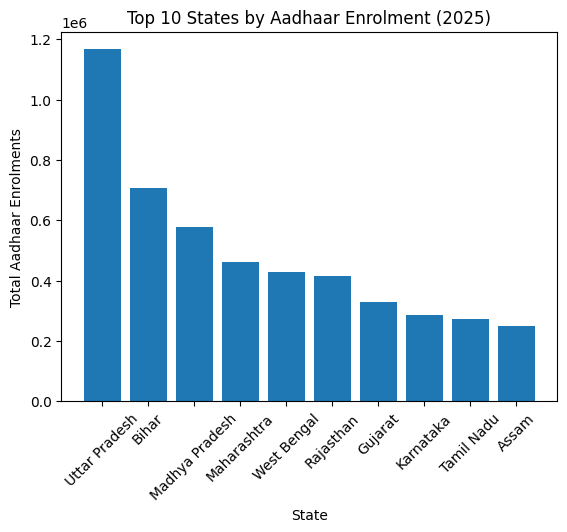

In [161]:
plt.figure()
plt.bar(top10['state'], top10['total_enrolment'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Top 10 States by Aadhaar Enrolment (2025)")
plt.show()

Higher enrolment volumes in economically active states suggest population concentration and migration-driven demand for Aadhaar services.

# Month-wise Aadhaar Enrolment Trend (2025)

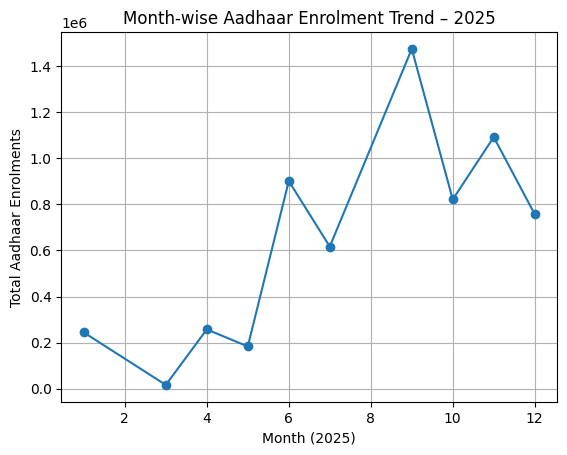

In [162]:
monthly_enrolment = (
df.groupby('month')['total_enrolment']
.sum()
.reset_index()
.sort_values('month')
)


plt.figure()
plt.plot(monthly_enrolment['month'], monthly_enrolment['total_enrolment'], marker='o')
plt.xlabel("Month (2025)")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Month-wise Aadhaar Enrolment Trend – 2025")
plt.grid(True)
plt.show()

Seasonal fluctuations in enrolment indicate campaign-driven or administrative demand rather than uniform enrolment throughout the year.

# Age-group Analysis (Key Societal Indicator)

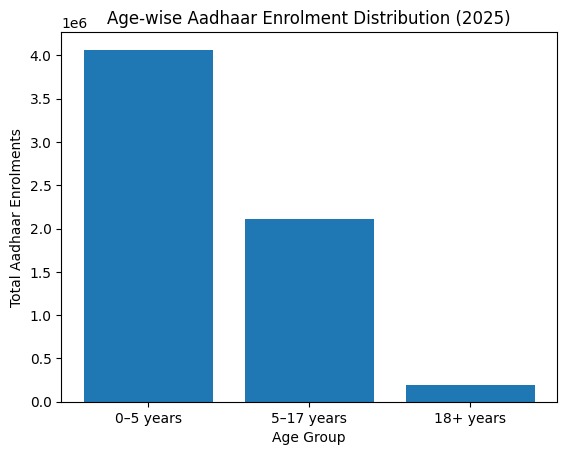

In [163]:
age_totals = pd.DataFrame({
'Age Group': ['0–5 years', '5–17 years', '18+ years'],
'Total Enrolment': [
df['age_0_5'].sum(),
df['age_5_17'].sum(),
df['age_18_greater'].sum()
]
})


plt.figure()
plt.bar(age_totals['Age Group'], age_totals['Total Enrolment'])
plt.xlabel("Age Group")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Age-wise Aadhaar Enrolment Distribution (2025)")
plt.show()

The majority of Aadhaar enrolments in 2025 are concentrated in the 0–5 and 5–17 age groups, indicating strong early-life and school-age identity inclusion, while relatively low enrolment in the 18+ group suggests that Aadhaar coverage among adults is largely saturated.

# District-level Enrolment Disparities

In [164]:
district_enrolment = (
df.groupby(['state', 'district'])['total_enrolment']
.sum()
.reset_index()
)


# Top and bottom districts
top_districts = district_enrolment.sort_values('total_enrolment', ascending=False).head(10)
bottom_districts = district_enrolment.sort_values('total_enrolment').head(10)


top_districts

,state,district,total_enrolment
323,Karnataka,Bengaluru Urban,69013
462,Maharashtra,Thane,49594
132,Bihar,Sitamarhi,46864
839,West Bengal,South 24 Parganas,42989
841,West Bengal,Uttar Dinajpur,42507
726,Uttar Pradesh,Bahraich,41388
830,West Bengal,Murshidabad,41337
832,West Bengal,North 24 Parganas,40654
453,Maharashtra,Pune,38536
604,Rajasthan,Jaipur,37634


In [165]:
 bottom_districts

,state,district,total_enrolment
612,Rajasthan,Khairthal-Tijara,1
585,Rajasthan,Balotra,1
2,Andaman and Nicobar Islands,Nicobars,1
589,Rajasthan,Beawar,1
138,Chandigarh,Mohali,1
668,Tamil Nadu,Tiruvarur,1
618,Rajasthan,Salumbar,1
188,Goa,Bardez,2
265,Jammu and Kashmir,Bandipur,2
614,Rajasthan,Kotputli-Behror,2


Sharp disparities between high- and low-enrolment districts reveal uneven access to Aadhaar enrolment infrastructure, particularly affecting rural and remote regions.

# Anomaly Detection (Spikes and Dips)

In [166]:
monthly_enrolment.sort_values('total_enrolment')

,month,total_enrolment
1,3,16582
3,5,183616
0,1,244276
2,4,257438
5,7,616868
9,12,757511
7,10,821533
4,6,901539
8,11,1092275
6,9,1474858


Unusually high or low enrolment months suggest short-term operational factors such as targeted enrolment drives, reporting gaps, or temporary service disruptions.